<a href="https://colab.research.google.com/github/kaluznys/uczenie_maszynowe_UW/blob/main/praca_domowa_8_um.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Working with Other Loss Functions**

-------------------------------

During the class today, we reconstructed an **ellipse**. The ellipse was defined with two **foci** and $C$ (the sum of distances of the ellipse points from the foci).

To reconstruct the ellipse through optimization, we began with **$N$ points** scattered randomly in the 2D plane. Our goal was to adjust their positions so that they satisfy the elliptical constraint as closely as possible. We achieved this by minimizing the **error-related loss**, $L^{(2)}_{\text{ellipse}}$ which was defined in today's class with $\ell_2$ norm as:

$$
L^{(2)}_{\text{ellipse}} = \frac{1}{N} \sum_{i=1}^{N} \epsilon_i^2
$$

where
$$
 \epsilon_i = d_{i1} + d_{i2} - C
$$
where $N$ is the number of points, and $d_{i1}, d_{i2}$ are their distances to the two foci.

In the homework assignment you will experiment with 3 other loss definitions based on some other possible norms.



1. $\ell_0$ norm resulting in
  $$
  L^{(0)}_{\text{ellipse}} = \frac{1}{N} \sum_{i=1}^{N} \mathbf{1}(\epsilon_i \neq 0)
  $$
  - If you actually succeed to code this loss function, the question for you to answer in relation to $L^{(0)}_{\text{ellipse}}$ is why the training is not progressing with passing epochs.
  - If you actually fail to code this loss function, the question for you to answer is to explain the failure and reason out theoretically, why the training would not be progressing with passing epochs, anyway.

1. $\ell_1$ norm resulting in
  $$
  L^{(1)}_{\text{ellipse}} = \frac{1}{N} \sum_{i=1}^{N} |\epsilon_i|
  $$
  The question for you to answer in relation to $L^{(1)}_{\text{ellipse}}$ is why the training loss doesn't converge, even after the ellipse has been fully drawn.

1. $\ell_\infty$ norm resulting in
  $$
  L^{(\infty)}_{\text{ellipse}} =  \max_{i} |\epsilon_i|
  $$
  The question for you to answer in relation to $L^{(\infty)}_{\text{ellipse}}$ is why the training takes so long and it doesn't converge in the end, either.

## **Points to Note**

1. Draw both the shape that the points draw as they move, and the loss value after each epoch, just as we did in class today.

2. Note, that the purpose of this excercise is not that you reconstruct a perfect ellipse, but rather that you give it a try, and even if you fail you should document and explain the failure, and answer a question related to a given loss definition.

3. You can also play around with the learning rate to try to improve convergence.

## **Task & Deliverables**
  
   - Document your experiments (python code and charts) and **write down your conclusions** into the Colab notebook.
   - It is not strictly required, but **if you make a movie showing the optimization progress it will be considered a strong point of your solution**
     - You can make a movie programmatically as we did in clustering class (our second class) with EM clustering,
     - or, you can save to disk the image files with epoch charts and use an external tool to bind them into a movie. Provide links to movie files in the README.
   - Place the Colab notebook  with the solution in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook (and any movies you created) and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.

## Sample code

   You can use the sample code provided below:



In [14]:
def plot_results(epoch, trajectories, loss_history=None):
    if loss_history is not None:
      fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    else:
      fig, axes = plt.subplots(1, 1, figsize=(6, 6))
      axes = [axes]
    points = np.array([trajectories[i][-1] for i in range(num_points)])
    # Left plot: Scatter of points with trajectories
    axes[0].scatter(points[:, 0], points[:, 1], label=f'Points - Epoch {epoch}')
    f1 = focus1.detach().cpu().numpy()
    f2 = focus2.detach().cpu().numpy()
    axes[0].scatter([f1[0], f2[0]], [f1[1], f2[1]], color='red', marker='x', s=100, label='Foci')

    # Draw movement traces
    for i in range(num_points):
        trajectory = np.array(trajectories[i])
        axes[0].plot(trajectory[:, 0], trajectory[:, 1], color='gray', linestyle='-', linewidth=0.5)

    axes[0].set_xlabel('X')
    axes[0].set_ylabel('Y')
    axes[0].legend()


    axes[0].grid()

    if loss_history is not None:
      axes[0].set_title(f'Points after Epoch {epoch}')
      # Right plot: Loss history
      axes[1].plot(loss_history, color='blue')
      axes[1].set_xlabel("Epoch")
      axes[1].set_ylabel("Loss")
      axes[1].set_title("Loss Convergence")
      axes[1].grid()
    else:
      axes[0].set_title(f'Points before Epoch {epoch}')

    plt.show()

In [15]:
def plot_starting(points):
  points_n = points.detach().numpy()
  plt.gcf().set_size_inches(5.5, 5.5)
  plt.scatter(points_n[:, 0], points_n[:, 1], label=f'generated Points', c ="blue")
  plt.scatter([focus1[0], focus2[0]], [focus1[1], focus2[1]], color='red', marker='x', s=100, label='Foci')
  plt.grid()
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.legend()
  plt.title('Starting Points')
  plt.show()

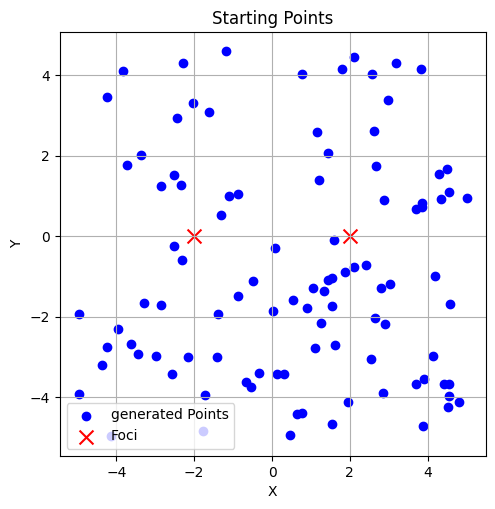

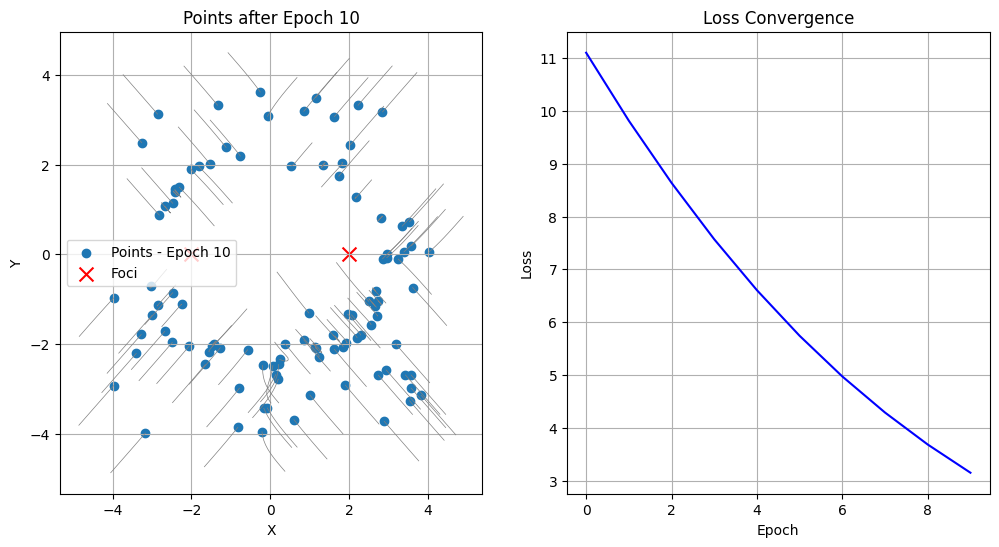

Epoch 10: Loss = 3.148989


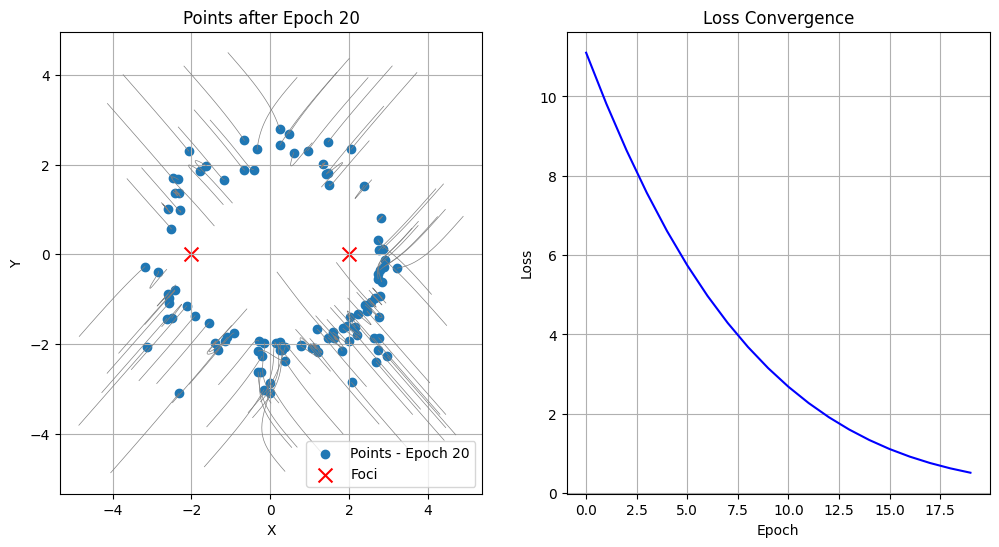

Epoch 20: Loss = 0.511986


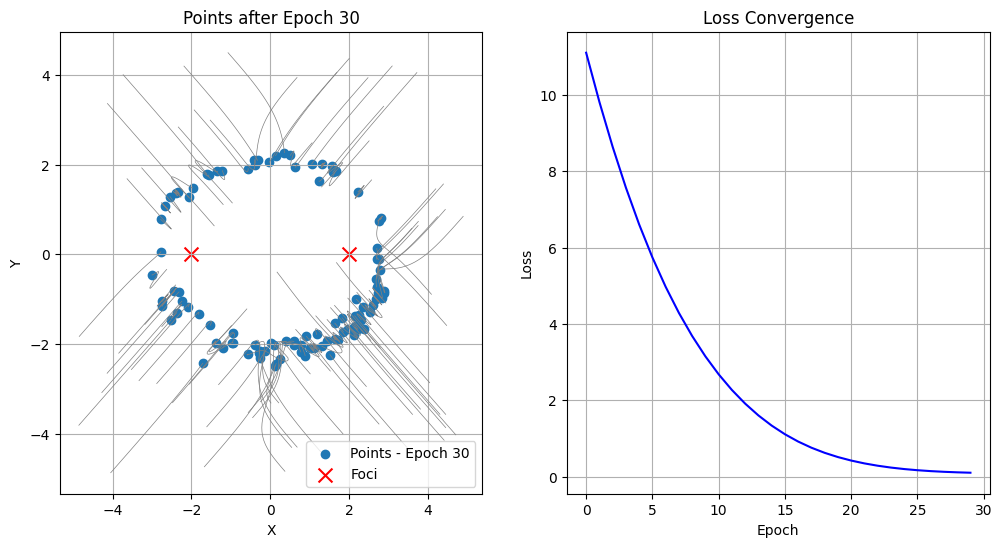

Epoch 30: Loss = 0.101917


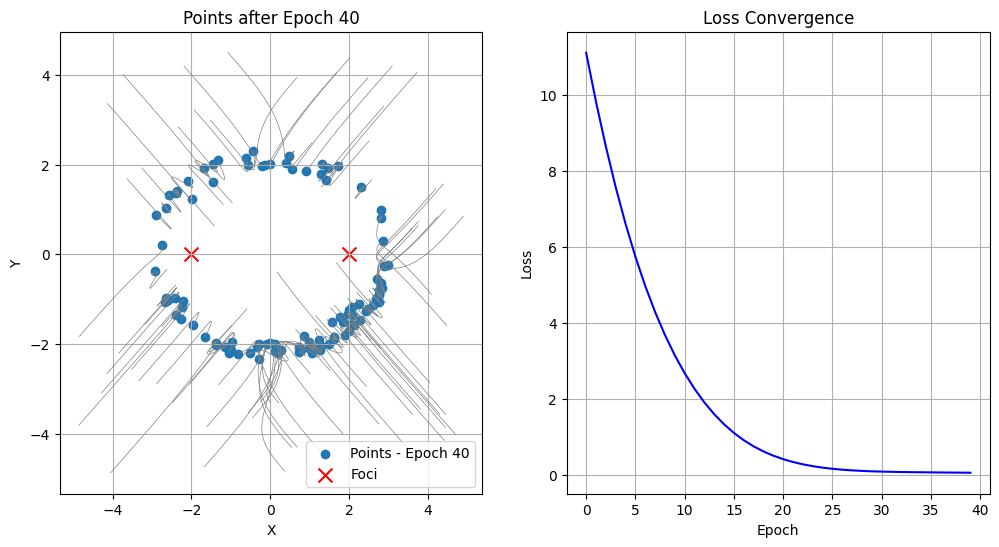

Epoch 40: Loss = 0.064591


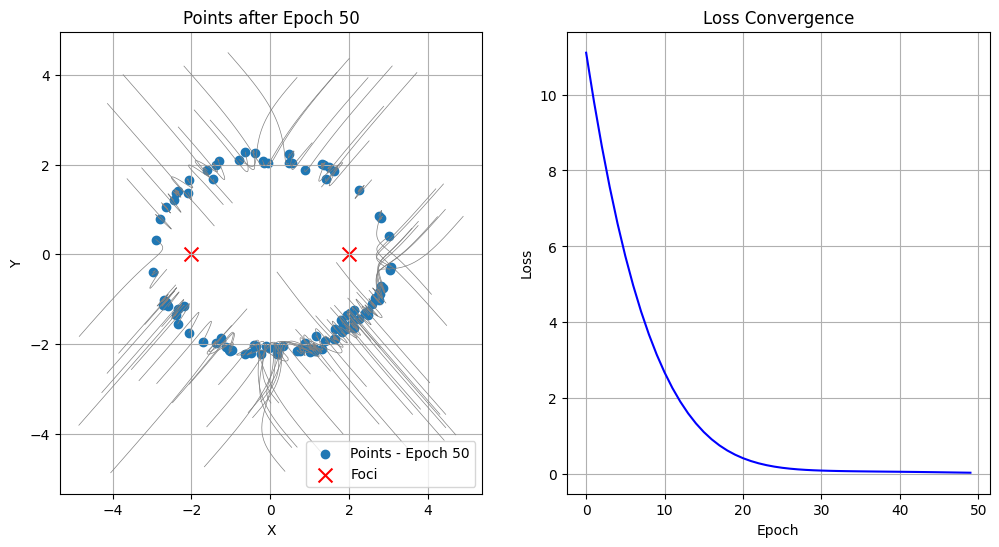

Epoch 50: Loss = 0.037551


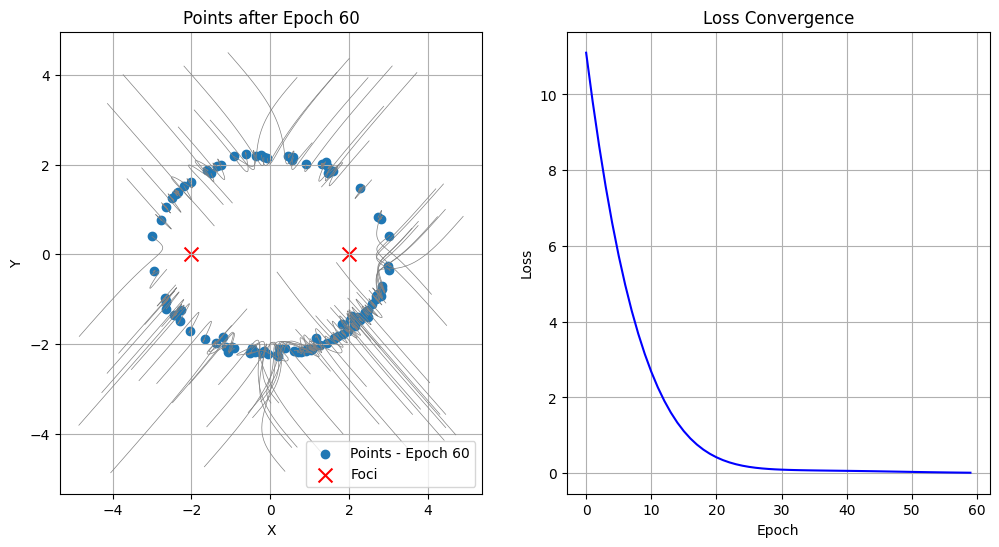

Epoch 60: Loss = 0.012863


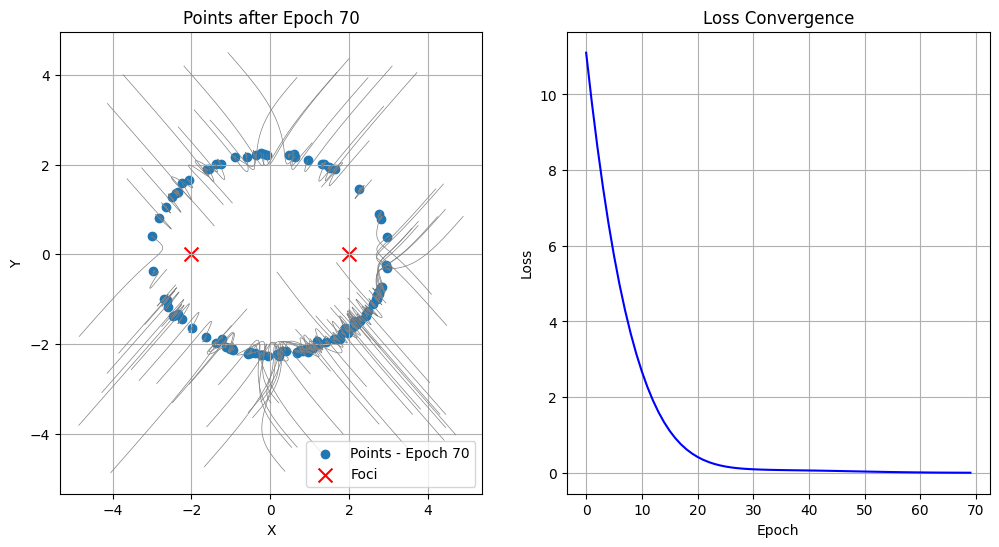

Epoch 70: Loss = 0.003287


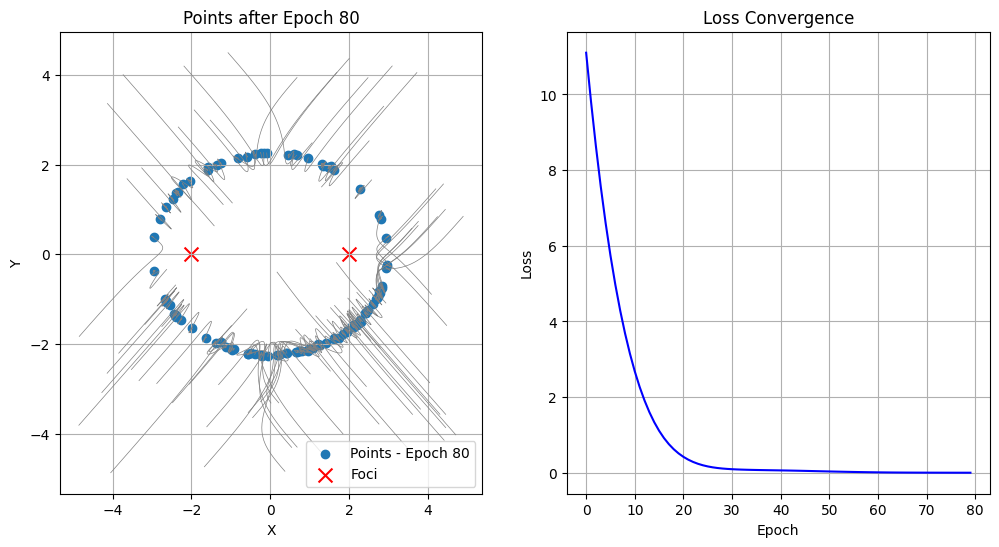

Epoch 80: Loss = 0.001197


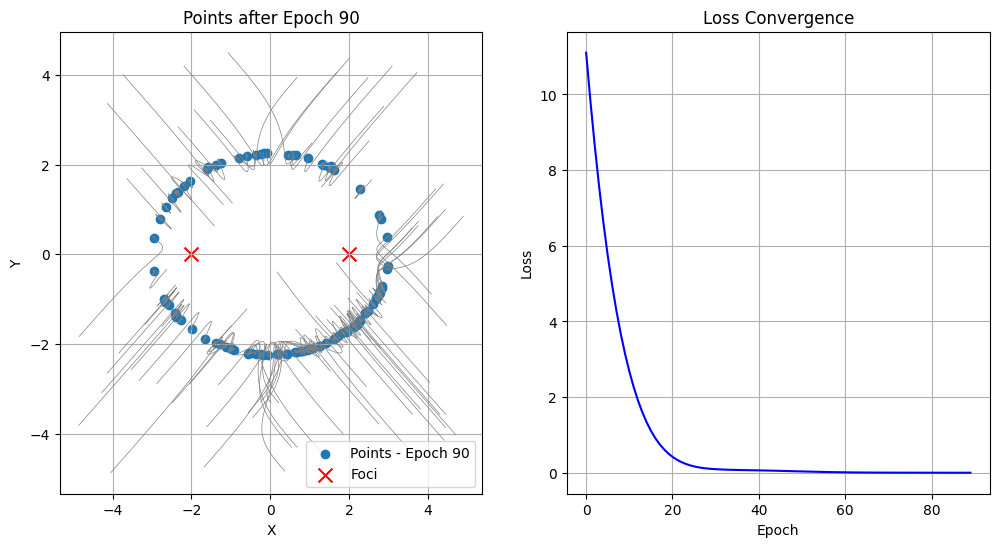

Epoch 90: Loss = 0.000528


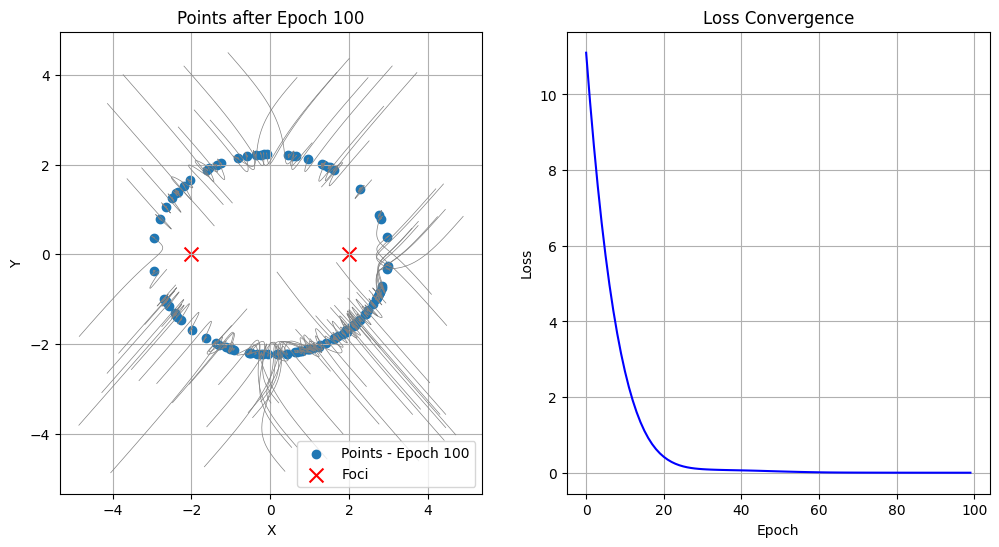

Epoch 100: Loss = 0.000173
Elapsed time: 11.374014377593994 seconds


In [16]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Fix the random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define ellipse parameters
focus1 = torch.tensor([-2.0, 0.0])  # First focus
focus2 = torch.tensor([2.0, 0.0])   # Second focus
constant_sum = 6.0  # The sum of distances to the two foci

# Initialize random 2D points from uniform distribution
num_points = 100
points = torch.rand((num_points, 2)) * 10 - 5  # Uniformly distributed in [-5, 5]
points.requires_grad = True

# Reset trajectories
trajectories = [[] for _ in range(num_points)]
loss_history, loss_l0_history, loss_l1_history, loss_linf_history = [], [], [], []

# Plot starting points
plot_starting(points)

import time
# Start timing
start_time = time.time()


# Define optimizer
optimizer = torch.optim.Adam([points], lr=0.1)

# Training loop
num_epochs = 100

for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Compute distances to both foci
    dist1 = torch.norm(points - focus1, dim=1)
    dist2 = torch.norm(points - focus2, dim=1)

    # Compute loss - it is implemented as MSE loss related to l_2 norm
    # TODO: your job is to replace the line below
    # with l_0, l_1 and l_infty - related loss
    loss = torch.mean((dist1 + dist2 - constant_sum) **2)
    indicator = (dist1 + dist2 - constant_sum) != 0

    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())
    optimizer.zero_grad()

    # Store current positions for tracking movement
    for i in range(num_points):
        trajectories[i].append(points[i].detach().cpu().clone().numpy())

    # Plot results every 10th epoch
    if (epoch+1) % 10 == 0:
        plot_results(epoch+1, trajectories, loss_history)

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}: Loss = {loss.item():.6f}")



# End timing
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

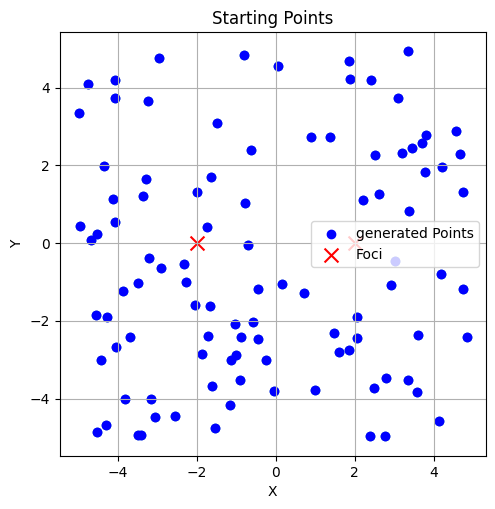

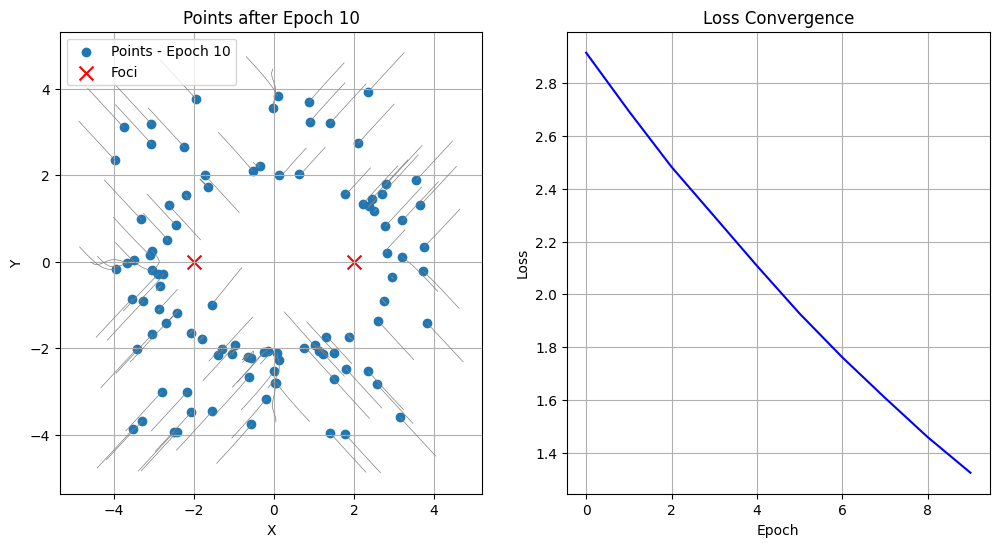

Epoch 10: Loss = 1.325012


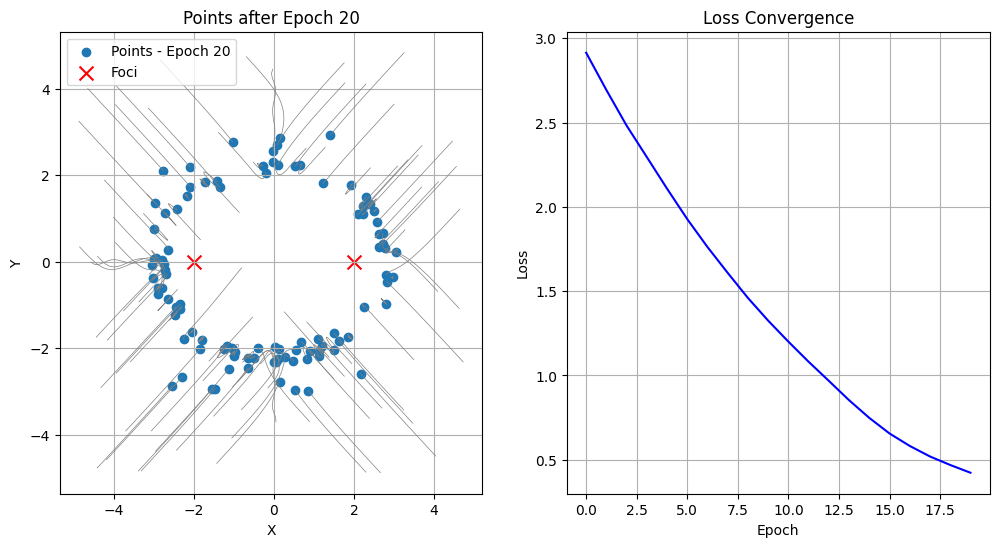

Epoch 20: Loss = 0.422803


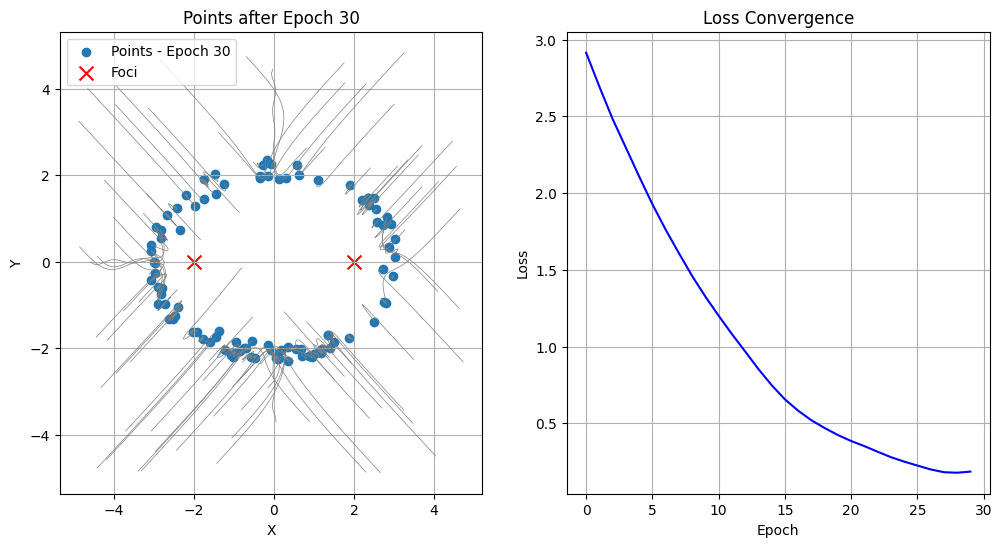

Epoch 30: Loss = 0.184727


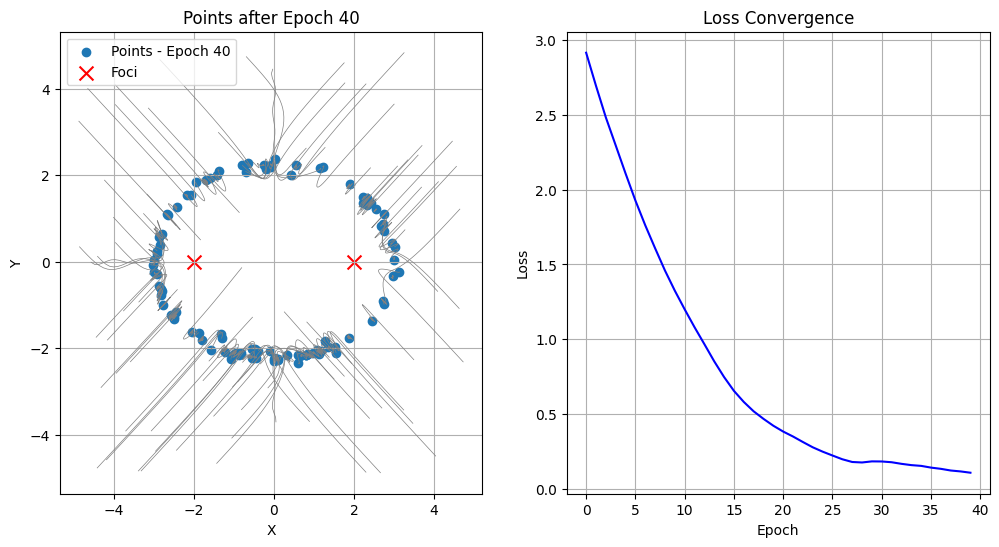

Epoch 40: Loss = 0.108961


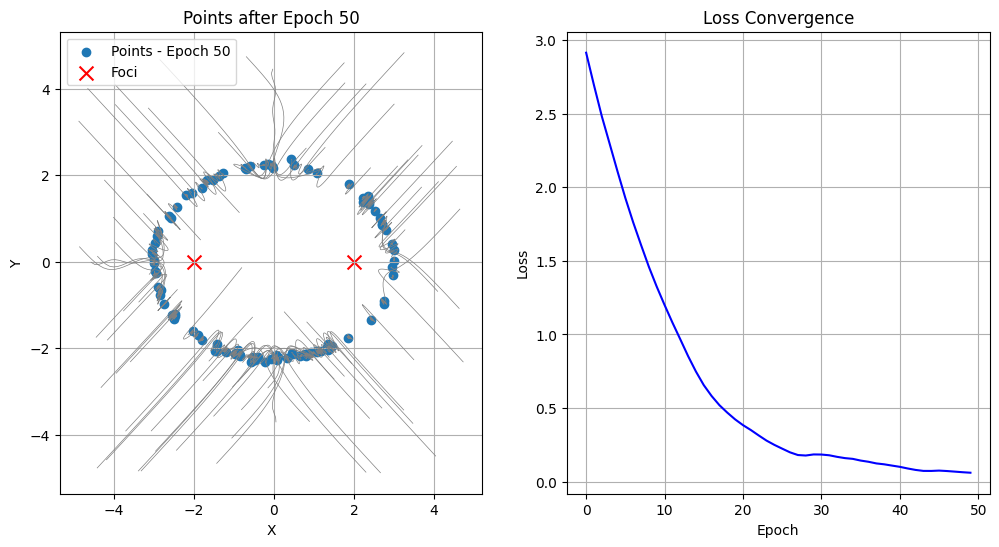

Epoch 50: Loss = 0.060492


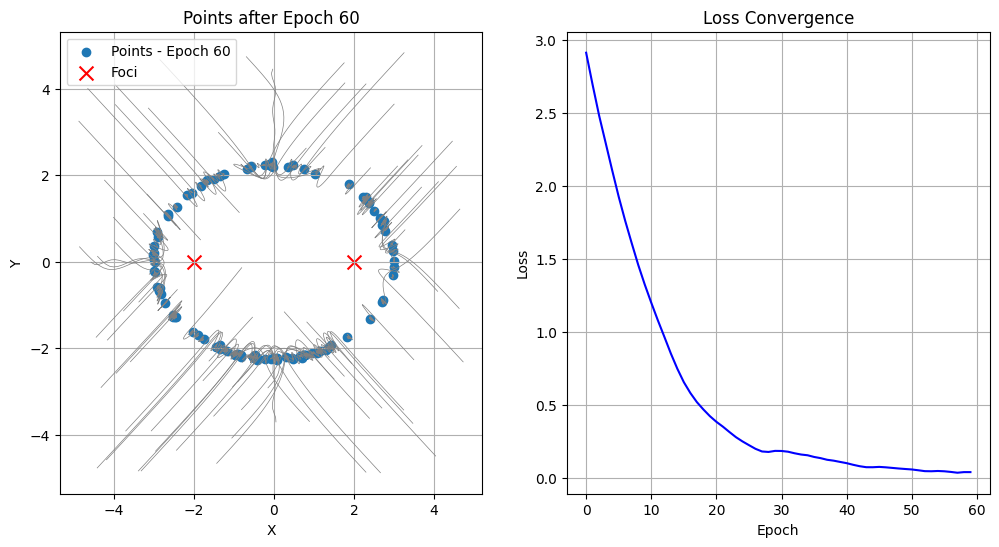

Epoch 60: Loss = 0.039098


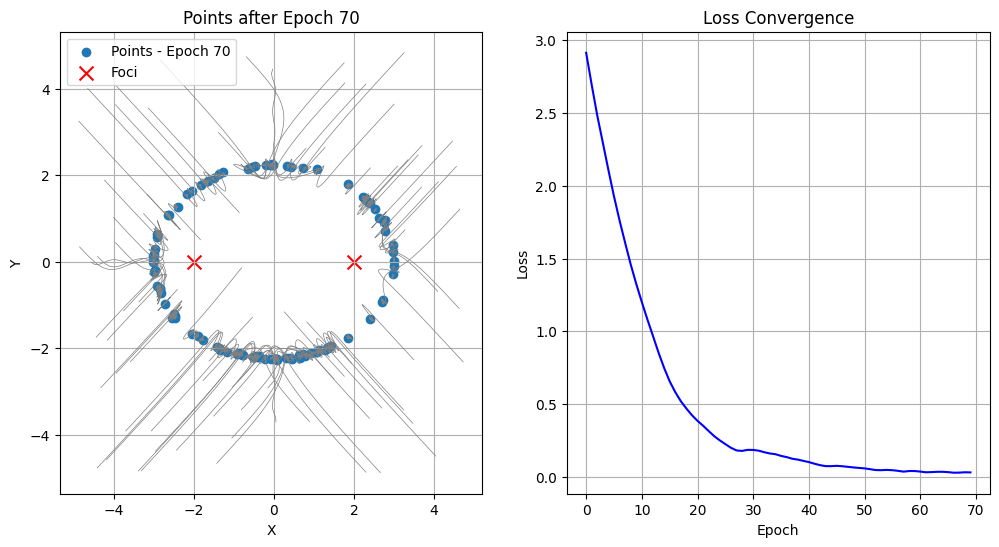

Epoch 70: Loss = 0.029680


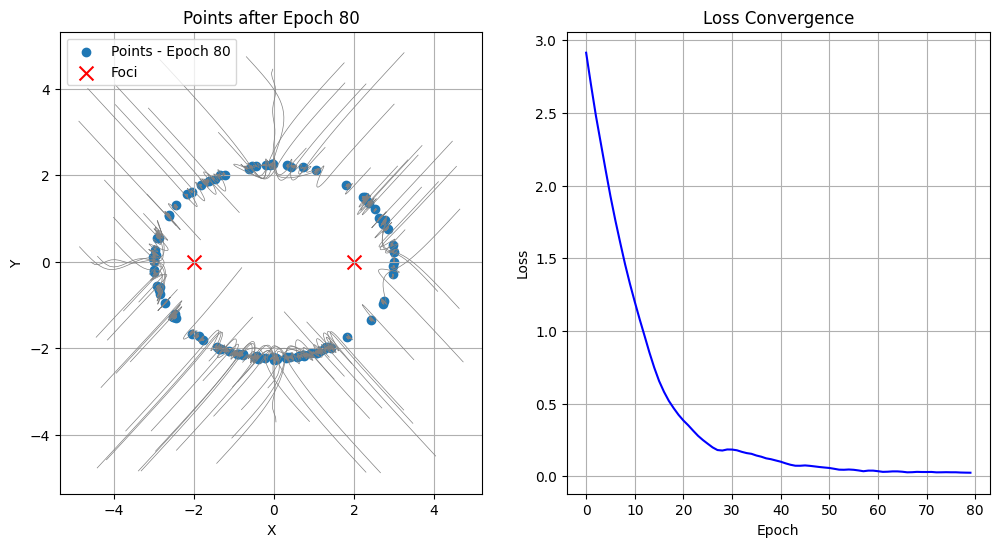

Epoch 80: Loss = 0.024692


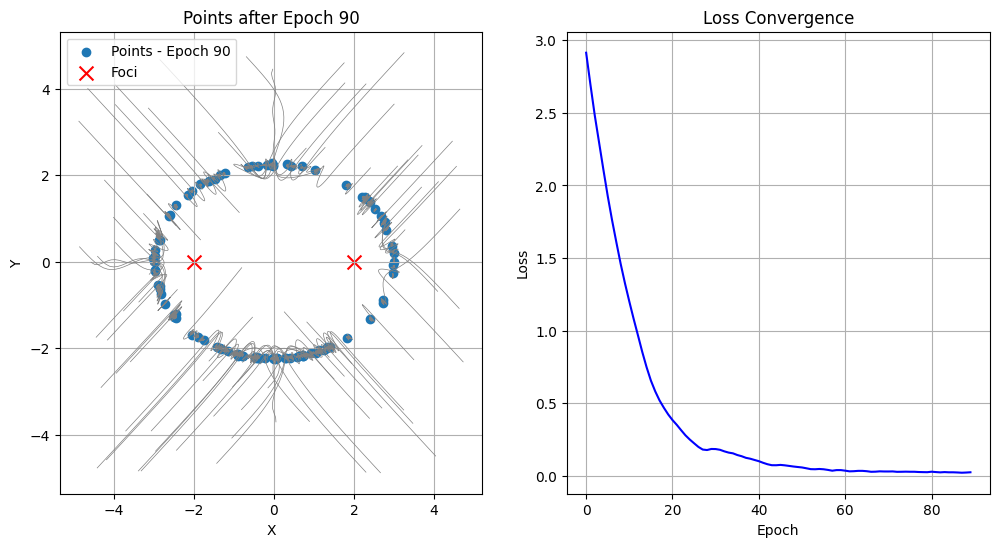

Epoch 90: Loss = 0.024182


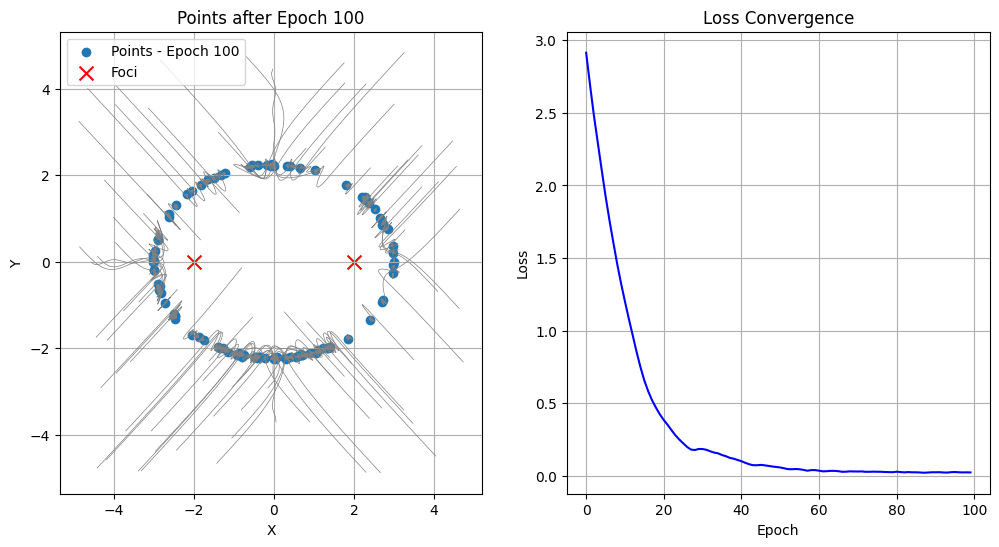

Epoch 100: Loss = 0.023075
Elapsed time: 5.167881011962891 seconds


In [17]:
trajectories = [[] for _ in range(num_points)]
loss_l1_history = []
num_points = 100
points = torch.rand((num_points, 2)) * 10 - 5  # Uniformly distributed in [-5, 5]
points.requires_grad = True
points_n = points.detach().numpy()
plt.scatter(points_n[:, 0], points_n[:, 1], )
import time
# Start timing
start_time = time.time()

# plot start
plot_starting(points)
# Define optimizer
optimizer = torch.optim.Adam([points], lr=0.1)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    dist1 = torch.norm(points - focus1, dim=1)
    dist2 = torch.norm(points - focus2, dim=1)
    loss_l1 = torch.mean(torch.abs(dist1 + dist2 - constant_sum))

    loss_l1.backward()
    optimizer.step()
    loss_l1_history.append(loss_l1.item())
    optimizer.zero_grad()
    for i in range(num_points):
        trajectories[i].append(points[i].detach().cpu().clone().numpy())

    # Plot results every 10th epoch
    if (epoch+1) % 10 == 0:
        plot_results(epoch+1, trajectories, loss_l1_history)
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}: Loss = {loss_l1.item():.6f}")


# End timing
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

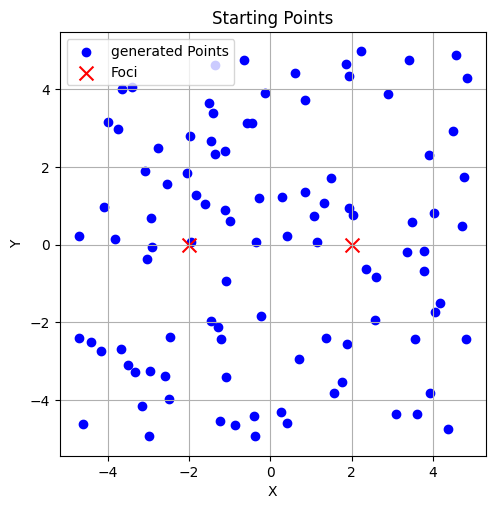

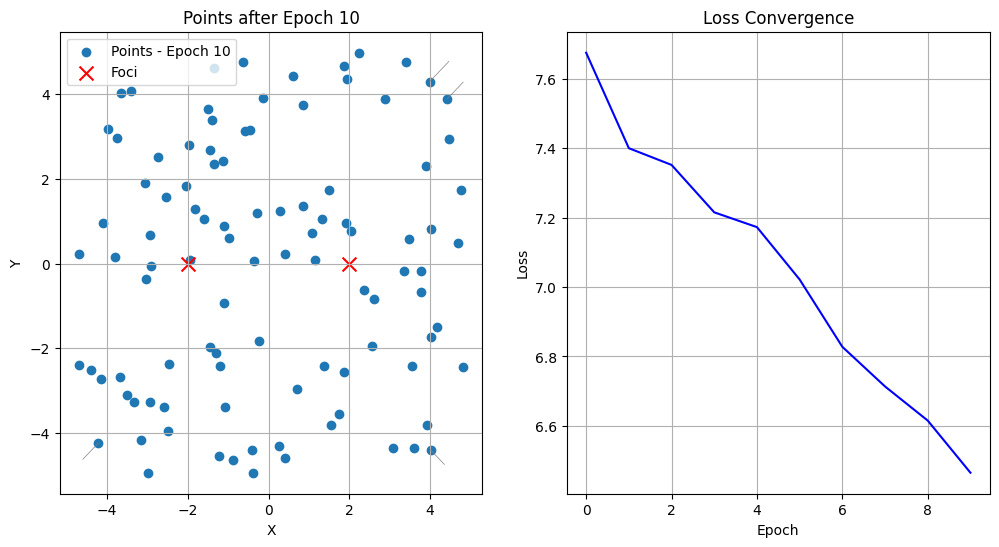

Epoch 10: Loss = 6.465471


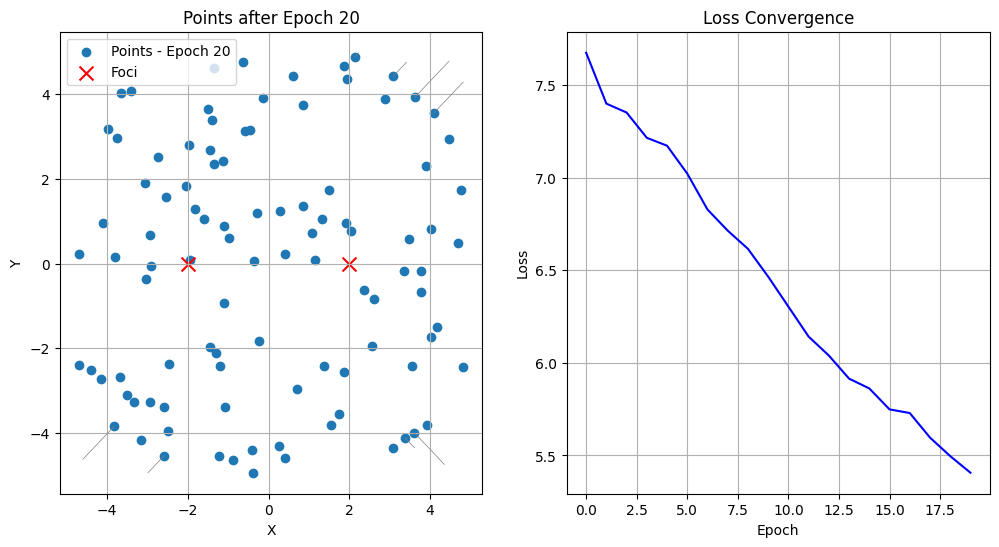

Epoch 20: Loss = 5.406991


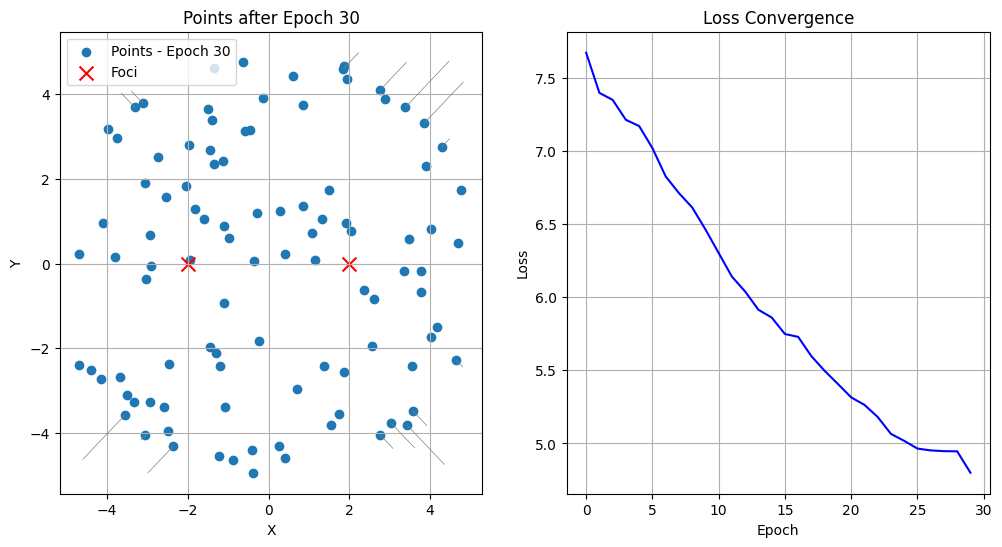

Epoch 30: Loss = 4.799417


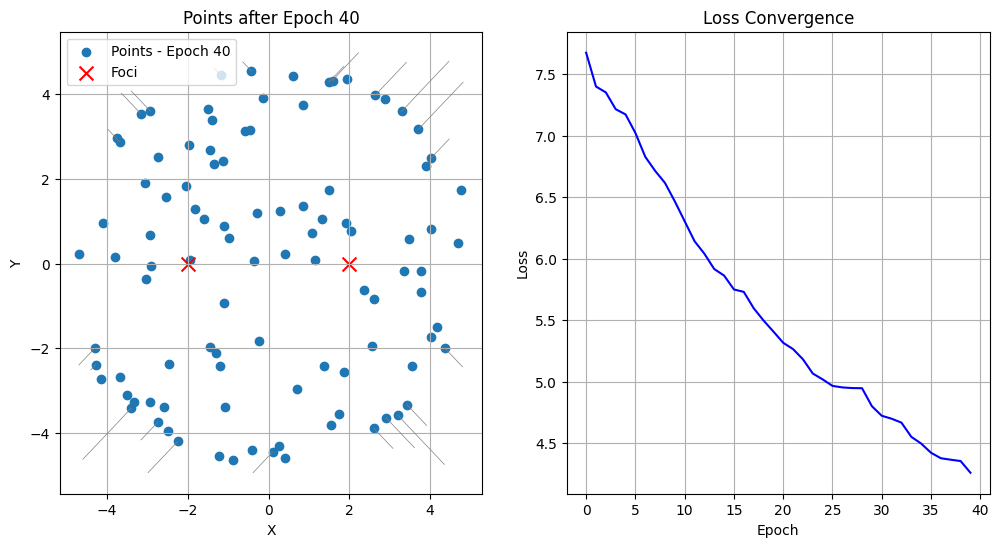

Epoch 40: Loss = 4.258459


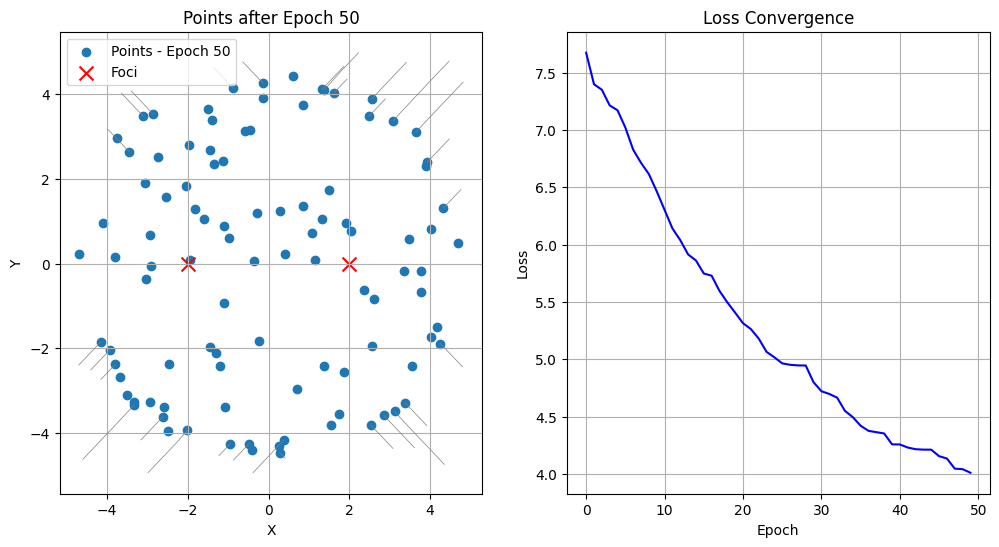

Epoch 50: Loss = 4.010794


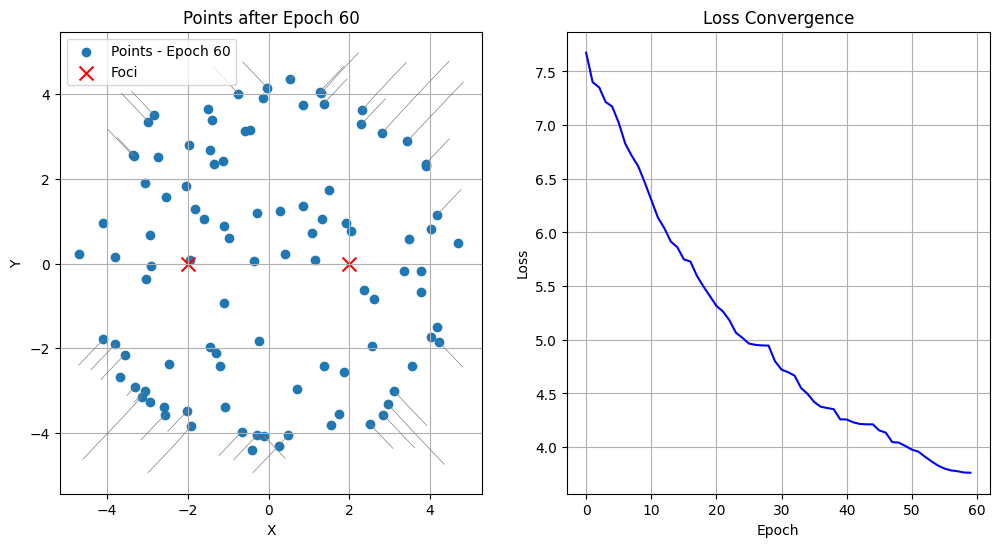

Epoch 60: Loss = 3.761169


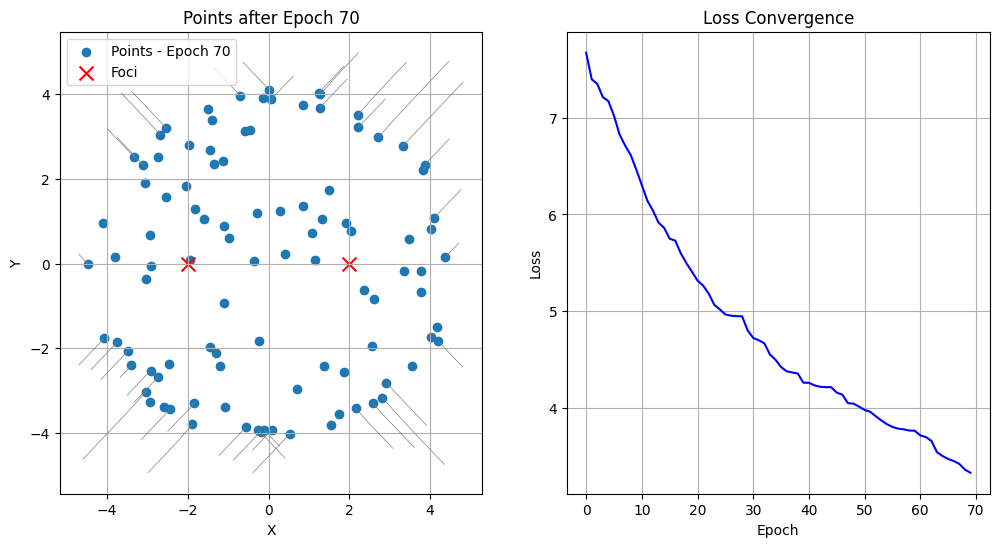

Epoch 70: Loss = 3.326316


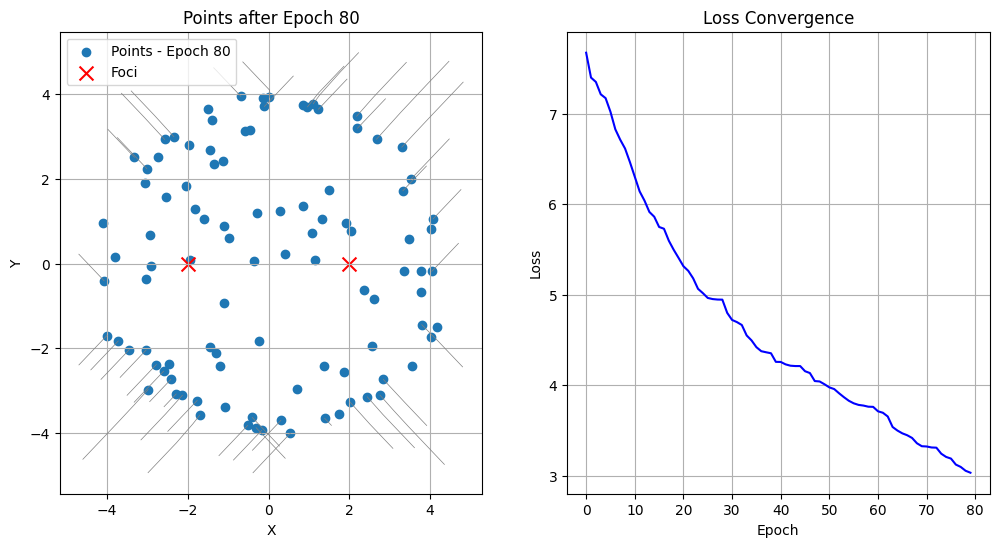

Epoch 80: Loss = 3.033399


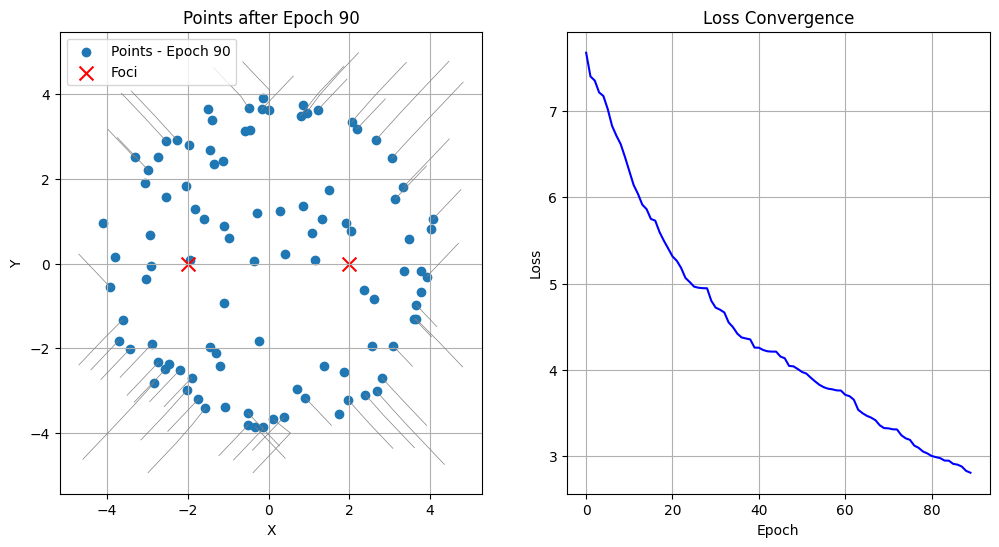

Epoch 90: Loss = 2.809280


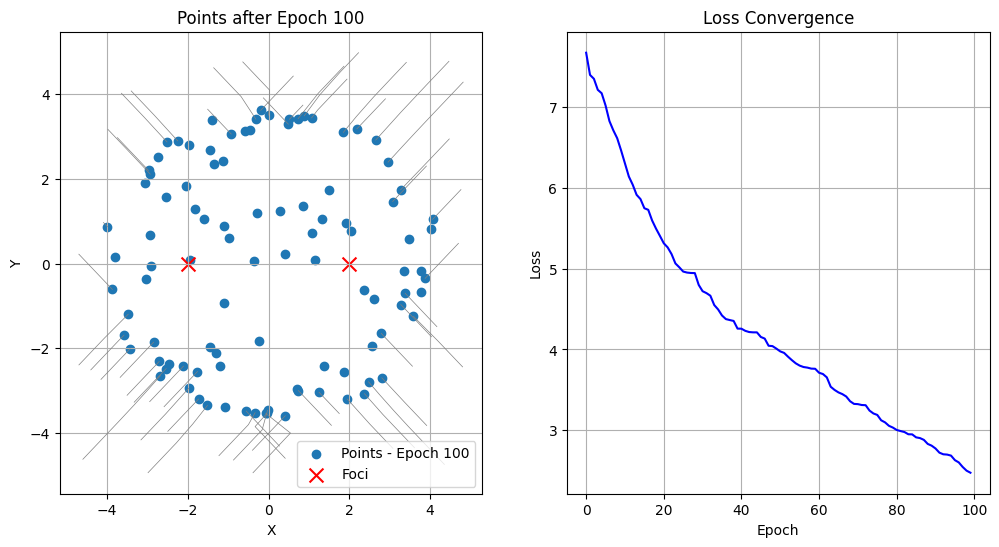

Epoch 100: Loss = 2.474096
Elapsed time: 5.6016926765441895 seconds


In [18]:
trajectories = [[] for _ in range(num_points)]
loss_linf_history = []
num_points = 100
points = torch.rand((num_points, 2)) * 10 - 5  # Uniformly distributed in [-5, 5]
points.requires_grad = True

import time
# Start timing
start_time = time.time()

# starting
plot_starting(points)

# Define optimizer
optimizer = torch.optim.Adam([points], lr=0.1)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    dist1 = torch.norm(points - focus1, dim=1)
    dist2 = torch.norm(points - focus2, dim=1)
    loss_linf = torch.max(torch.abs(dist1 + dist2 - constant_sum))

    loss_linf.backward()
    optimizer.step()
    loss_linf_history.append(loss_linf.item())
    optimizer.zero_grad()
    for i in range(num_points):
        trajectories[i].append(points[i].detach().cpu().clone().numpy())

    # Plot results every 10th epoch
    if (epoch+1) % 10 == 0:
        plot_results(epoch+1, trajectories, loss_linf_history)

    if (epoch +1) % 10 == 0:
        print(f"Epoch {epoch+1}: Loss = {loss_linf.item():.6f}")


# End timing
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")